In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal
from scipy.signal import resample
import sounddevice as sd
import soundfile as sf


In [2]:
def create_sin_waves(frequencies, amplitudes, phases, t):
    '''
    Parameters:
        frequencies (list): List of frequencies in Hz.
        amplitudes (list): List of amplitudes.
        phases (list): List of phases in radians.

    Returns:
        sinusoids (list): List of generated sinusoidal signals.
    '''

    sinusoids = []
    for freq, amp, phase in zip(frequencies, amplitudes, phases):
        sinusoid = amp * np.sin(2 * np.pi * freq * t + phase)
        sinusoids.append(sinusoid)
    return sinusoids

### 1. Create a synthetic signal as a sum of sinusoids (1 point)

#### a) create sinusoids with chosen amplitudes and phases

In [3]:
fs = 8000  # Sampling frequency (Hz)
duration = 3  # Duration of the signal (seconds)
n_samples = fs * duration  # Total number of samples

# Time vector
t = np.linspace(0, duration, n_samples, endpoint=False)
frequencies = [100, 500, 1500, 2500]  # Frequencies in Hz
amplitudes = [0.5, 1.0, 1.5, 2]  # Amplitudes
phases = [0, np.pi/2, np.pi, 3*np.pi/4]  # Phases

sinusoids = create_sin_waves(frequencies, amplitudes, phases, t)


#### b.1) Play sinusoids

In [5]:
# sd.play(sinusoids,fs)
for i, (freq, amp, phase) in enumerate(zip(frequencies, amplitudes, phases)):
    sd.play(sinusoids[i], fs)
    sd.wait()

#### b.2) Plot sinusoids (only first 200 samples are displayed for better visualization)

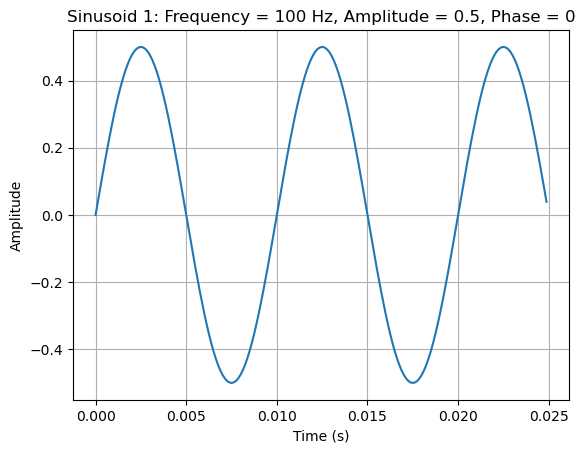

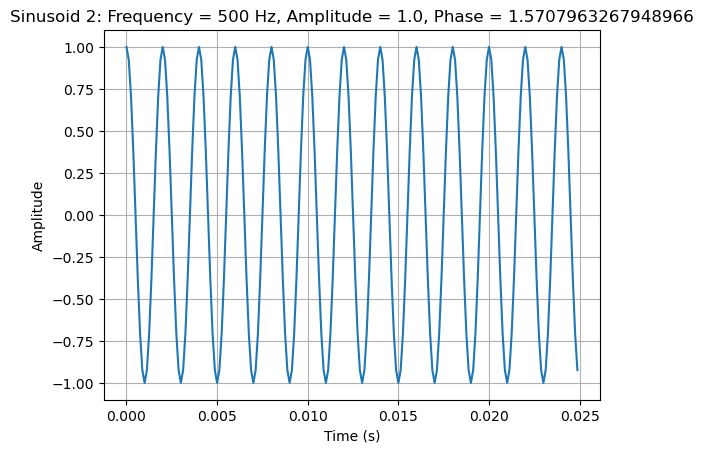

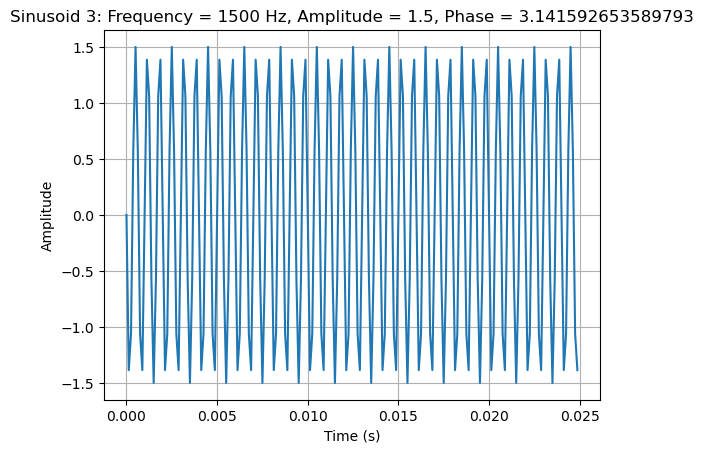

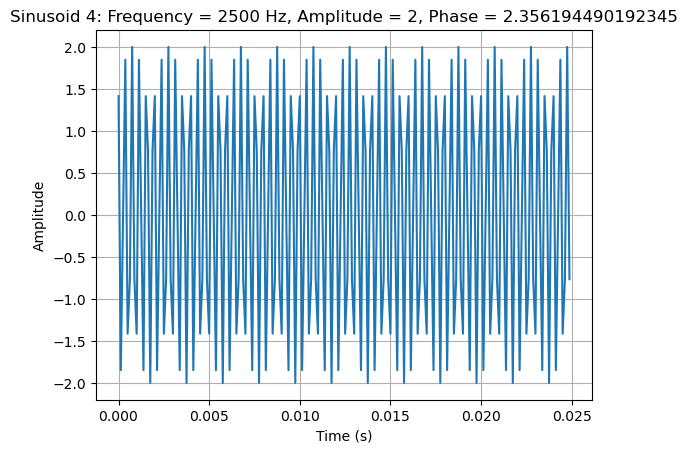

In [4]:
for i, (freq, amp, phase) in enumerate(zip(frequencies, amplitudes, phases)):
    plt.figure()
    plt.grid('on')
    plt.title(f'Sinusoid {i+1}: Frequency = {freq} Hz, Amplitude = {amp}, Phase = {phase}')
    plt.plot(t[:200], sinusoids[i][:200])
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

#### c) Add them up to x(t). Plot and play x(t). Write the signal to a wav file.

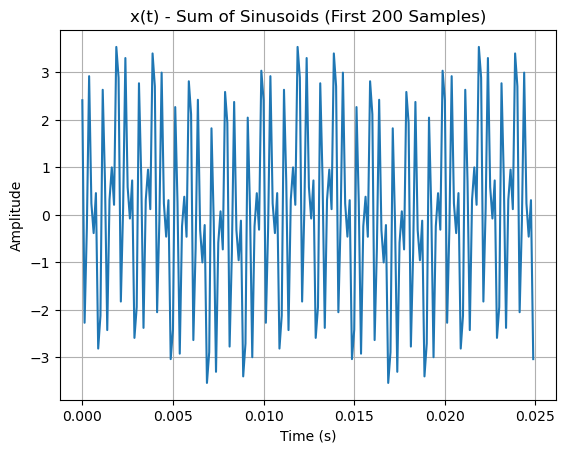

In [5]:
x_t = np.sum(sinusoids, axis=0)
plt.figure()
plt.grid('on')
plt.title('x(t) - Sum of Sinusoids (First 200 Samples)')
plt.plot(t[:200], x_t[:200])  # Display only the first 200 samples
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
sd.play(x_t, fs)
sd.wait()

# Write x(t) to a WAV file
sf.write('x(t).wav', x_t, fs)

#### d) Apply DFT with nfft= 512

Text(0.5, 1.0, 'Fig 1: Spectrum of the synthetic signal')

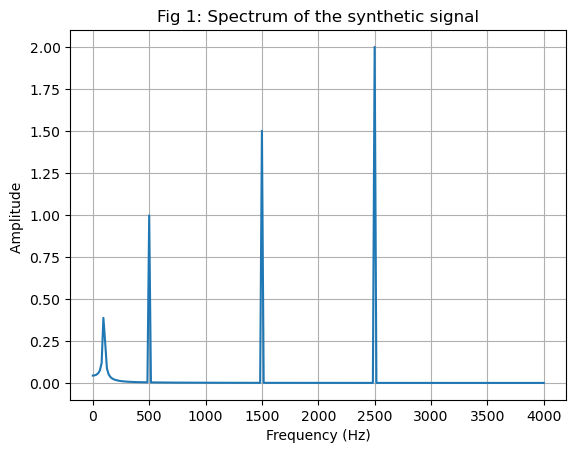

In [8]:
# 1d) Apply DFT with nfft= 512

K = 512
fre = np.arange(K) * (fs/K)
spectrum = fft(x_t,K)
plt.figure(1)
plt.grid('on')
plt.plot(fre[:len(fre)//2+1],2*abs(spectrum)[:len(fre)//2+1]/K)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude ')
plt.title('Fig 1: Spectrum of the synthetic signal')

#### d.1) Apply DFT with nfft= 258

[ 5.22513679  6.16297663 10.59190121 58.7237761  17.88646316  8.29321533
  5.67021172  4.48320026  3.84604515  3.50040662]


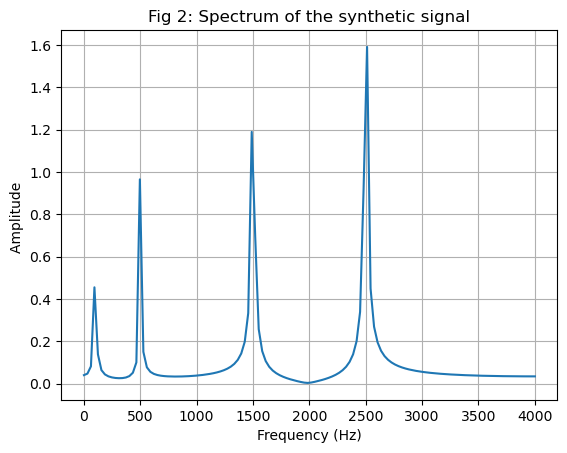

In [10]:
K = 258
fre = np.arange(K) * (fs/K)
spectrum = fft(x_t,K)
plt.figure(2)
plt.grid('on')
plt.plot(fre[:len(fre)//2+1],2*abs(spectrum)[:len(fre)//2+1]/K)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude ')
plt.title('Fig 2: Spectrum of the synthetic signal')
print(np.abs(spectrum[:10]))

#### d.2) Apply DFT with nfft= signal length

(array([0], dtype=int64),)


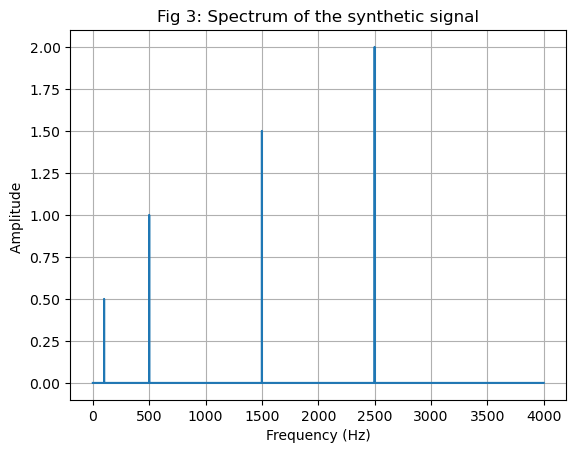

In [11]:
K = fs*3
fre = np.arange(K) * (fs/K)
spectrum = fft(x_t,K)
plt.figure(3)
plt.grid('on')
plt.plot(fre[:len(fre)//2+1],2*abs(spectrum)[:len(fre)//2+1]/K)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude ')
plt.title('Fig 3: Spectrum of the synthetic signal')
print(np.where(np.any(np.abs(spectrum) >1e-15)))

#### e) Observe the components and relationship between nfft and frequency in Hz. Report your observation

In [31]:
# When changing the value of nfft, I'm essentially changing the frequency resolution of the DFT.
# A larger nfft results in a finer frequency grid but requires more computation. A smaller nfft provides
# coarser frequency resolution but is computationally faster.

### 2. Read an audio and observe the spectrum. (1 point)

#### a) Read 'audio1.wav' 

In [13]:
audio_file = "audio1.wav"
audio, fs = sf.read(audio_file)

#### a.1-2) Play & Plot

In [16]:
sd.play(audio, f_s)
sd.wait()  

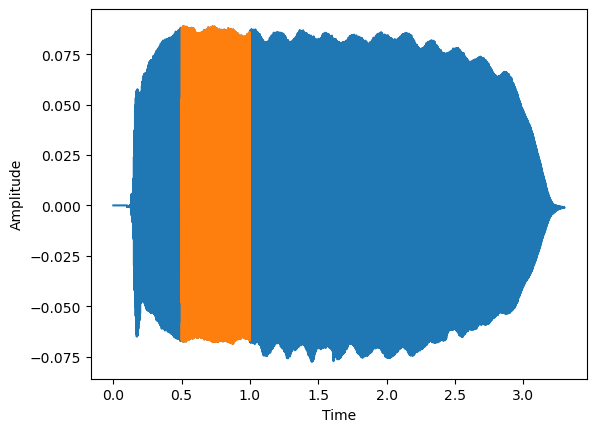

In [14]:
time_axis = np.linspace(0, len(audio)/fs, len(audio), endpoint=False)
plt.plot(time_axis, audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")


plt.plot(time_axis[int(0.5*fs): fs], audio[int(0.5*fs): fs]) # portion of audio1 between 0.5 to 1 sec

#### a.3) Read 'audio2.wav' 

In [15]:
audio_file = "audio2.wav"
audio, fs = sf.read(audio_file)

#### a.4) Play

In [16]:
sd.play(audio, fs)
sd.wait() 

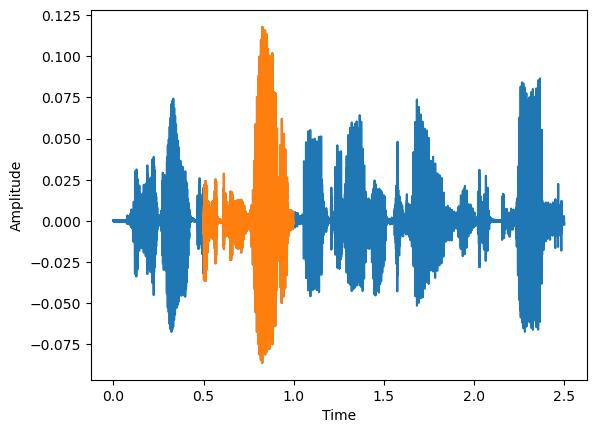

In [17]:
time_axis = np.linspace(0, len(audio)/fs, len(audio), endpoint=False)
plt.plot(time_axis, audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")

plt.plot(time_axis[int(0.5*fs): fs], audio[int(0.5*fs): fs]) # portion of audio1 between 0.5 to 1 sec

#### c,d) Compute DFT in a loop for 'audio1.wav' 

sampling rate for audio is : 44100


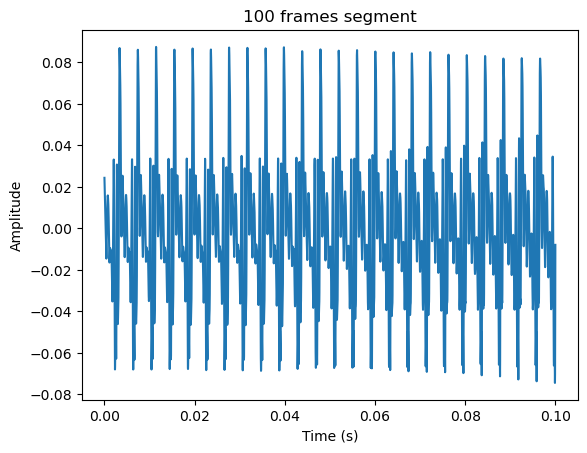

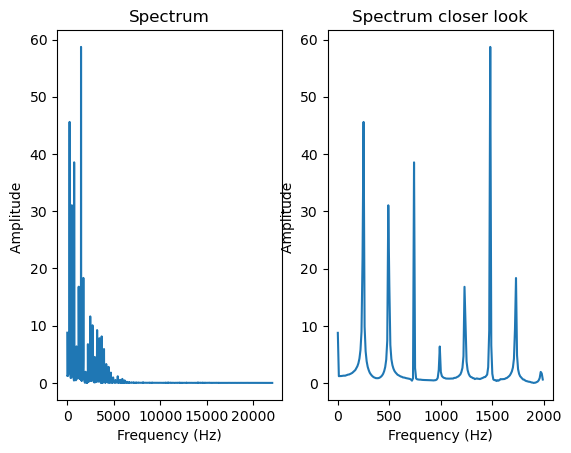

In [19]:
def process_audio_segments(audio_file):
    audio, fs = sf.read(audio_file)
    print('sampling rate for audio is :', fs)

    frame_length = 0.1*fs      # time_duration * fs
    audio = audio[int(1*fs) :] # signal from 1 sec to the end
    nfft = int(frame_length)   # choose number of DFT points

    # Loop for DFT computation
    DFT = []
    for i in np.arange(0,len(audio)//frame_length):

        s = audio[int(i*frame_length): int((i+1)*frame_length)]
        spectrum = fft(s, nfft)
        DFT.append(spectrum)

        if i == 0:           # plot first audio frame
            plt.figure()
            t = np.linspace(0,len(s)/fs,len(s))
            plt.plot(t, s)
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
            plt.title('100 frames segment')

            plt.figure()
            plt.subplot(1, 2, 1)
            fre = np.arange(nfft) * (fs/nfft)     # dividing the number of points by freq resolution (fs/nfft)
            plt.plot(fre[:len(fre)//2+1], abs(spectrum)[:len(fre)//2+1])
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Amplitude ')
            plt.title('Spectrum')

            # Zoom in first 200 points
            plt.subplot(1, 2, 2)
            plt.plot(fre[:200], abs(spectrum)[:200])
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Amplitude ')
            plt.title('Spectrum closer look')
            
process_audio_segments("audio1.wav")

#### c,d) Compute DFT in a loop for 'audio2.wav' 

sampling rate for audio is : 22050


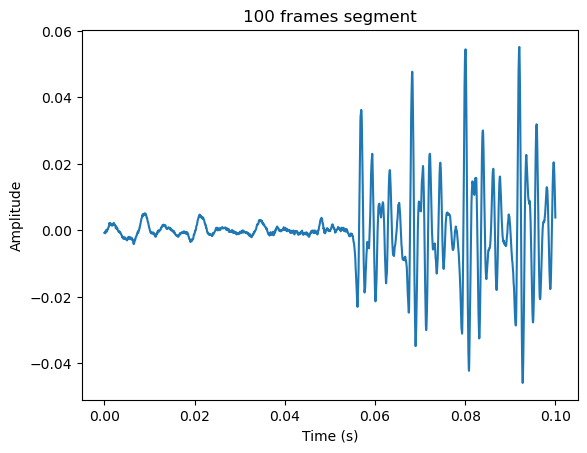

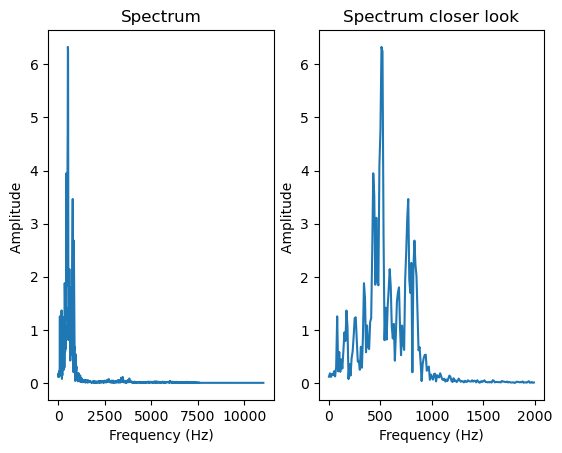

In [20]:
process_audio_segments("audio2.wav")

####  The audio1.wav will have a clear spectral peak at its frequency, while the voice recording - audio2.wav will exhibit a broader and more complex spectrum with multiple frequency components corresponding to speech.

#### e) How does the spectrum of these signals differ from that of sum of sinusoids? 

sampling rate for audio is : 8000


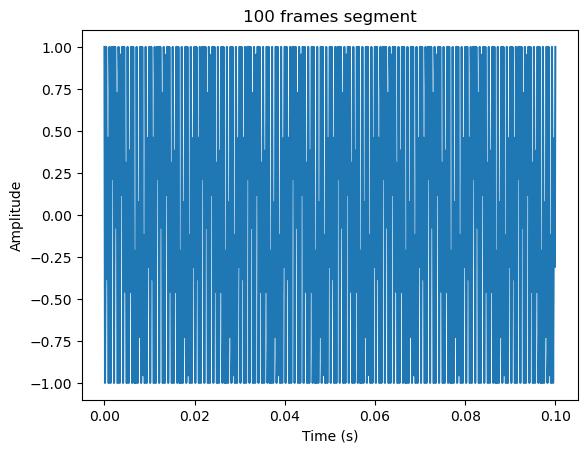

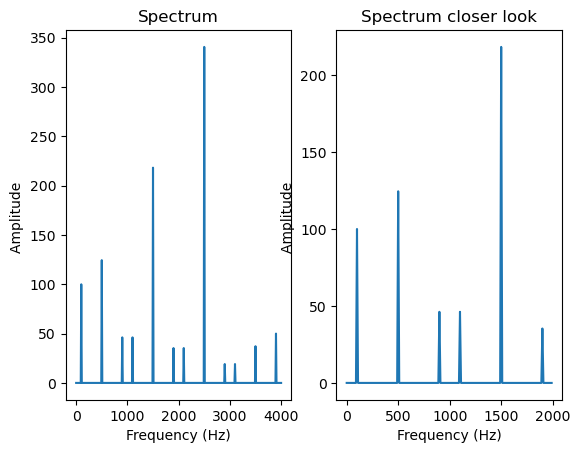

In [21]:
process_audio_segments("x(t).wav")

#### Real-world audio signals exhibit a continuous spectrum, meaning that they have a continuous distribution of frequency components. In contrast, a sum of sinusoids has a discrete spectrum with well-defined and evenly spaced spectral lines corresponding to the individual sinusoidal components used in the synthesis.

### Bonus problem:

In [22]:
data, sample_rate = sf.read("x(t).wav")

downsampled_signal = resample(data, len(data) // 2)

# Write the downsampled signal to a WAV file
sf.write("downsampled_x.wav", downsampled_signal, sample_rate // 2)

Text(0.5, 1.0, 'Spectrum')

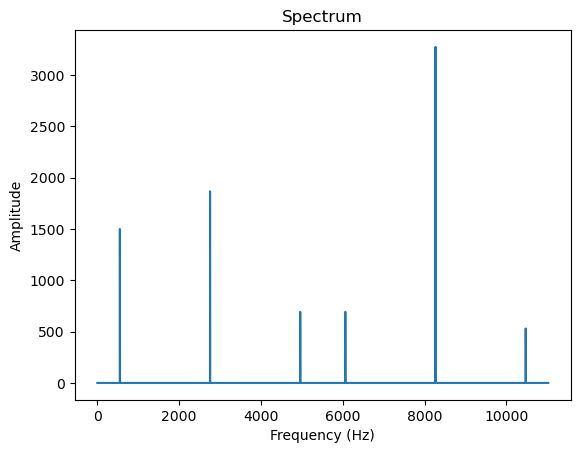

In [24]:
nfft = len(downsampled_signal)
spec = fft(downsampled_signal, nfft)       # compute DFT

# plot
plt.figure()
fre = np.arange(nfft) * (fs/nfft)
plt.plot(fre[:len(fre)//2+1],abs(spec)[:len(fre)//2+1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum')

In [ ]:
# The downsampled signal's DFT essentially compresses the frequency axis by a factor of 2
# This is reflected in the halved frequencies in the DFT plot.